<a href="https://colab.research.google.com/github/PREMKUMAR-E/AppliedDataScience_Phase1/blob/main/IDBM_scores_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/NetflixOriginals.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime,timedelta

In [5]:
ds = pd.read_csv("/content/NetflixOriginals.csv",encoding = "ISO-8859-1")
ds_date = ds.copy()
ds.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [7]:
ds.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [8]:
ds.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [9]:
ds['Title'].value_counts()

Enter the Anime                                   1
Have a Good Trip: Adventures in Psychedelics      1
Tallulah                                          1
The Old Guard                                     1
Tony Robbins: I Am Not Your Guru                  1
                                                 ..
Cam                                               1
Earthquake Bird                                   1
Frankenstein's Monster's Monster, Frankenstein    1
Horse Girl                                        1
David Attenborough: A Life on Our Planet          1
Name: Title, Length: 584, dtype: int64

In [10]:
ds['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [11]:
ds['Premiere'].value_counts()

October 2, 2020       6
November 1, 2019      5
October 18, 2019      5
November 2, 2018      4
June 19, 2020         4
                     ..
September 20, 2019    1
March 10, 2017        1
March 17, 2017        1
May 29, 2015          1
October 4, 2020       1
Name: Premiere, Length: 390, dtype: int64

In [12]:
ds_date["Premiere"] = ds_date["Premiere"].apply(lambda x: "".join(x for x in x.replace(".",",")))
ds_date["PremiereDate"] = ds_date["Premiere"].apply(lambda x: datetime.strptime(x, "%B %d, %Y").date())
ds_date["Year"] = ds_date["Premiere"].apply(lambda x: "".join(x for x in x.replace(",","").split()[-1]))

#Convert object to date
ds_date["PremiereDate"] = pd.to_datetime(ds_date["PremiereDate"])
ds_date

,Title,Genre,Premiere,Runtime,IMDB Score,Language,PremiereDate,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09,2015
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08,2020


In [13]:
ds_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         584 non-null    object        
 1   Genre         584 non-null    object        
 2   Premiere      584 non-null    object        
 3   Runtime       584 non-null    int64         
 4   IMDB Score    584 non-null    float64       
 5   Language      584 non-null    object        
 6   PremiereDate  584 non-null    datetime64[ns]
 7   Year          584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.6+ KB


In [14]:
ds['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [15]:
ds['Genre'].value_counts()
genre = ds['Genre'].value_counts()
genre.head()

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: Genre, dtype: int64

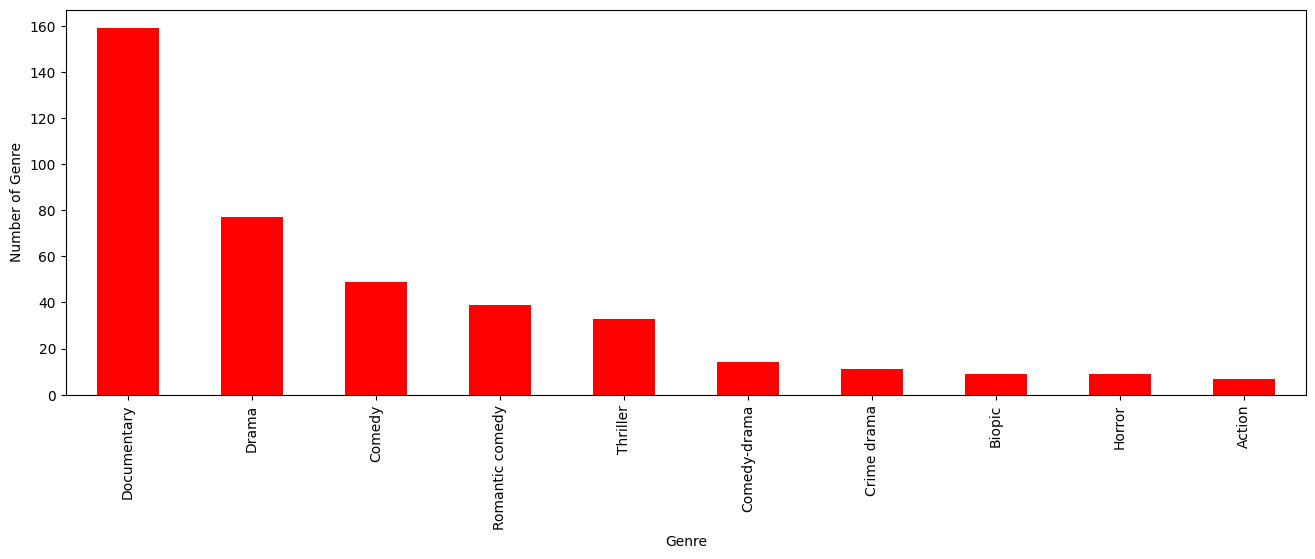

In [16]:
plt.figure(figsize=(16, 5))
ds['Genre'].value_counts().head(10).plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Number of Genre')
plt.xticks(rotation=90)
plt.show(block=True)

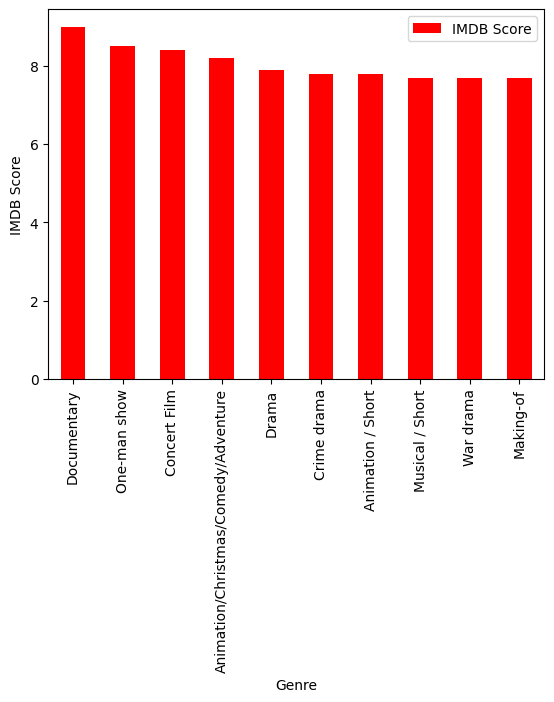

In [17]:
ds[['Genre', 'IMDB Score']].sort_values('IMDB Score', ascending=False).drop_duplicates('Genre').head(10).plot(x='Genre', y='IMDB Score', kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
plt.show(block=True)

In [18]:
ds['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

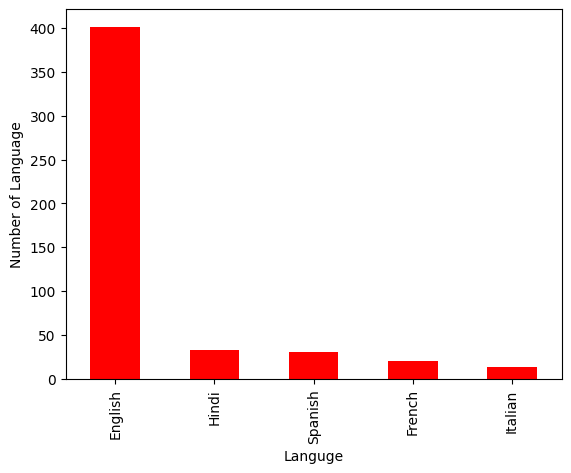

In [19]:
ds_lang = ds['Language'].value_counts()
ds_lang.head(5).plot(kind='bar', color='red')
plt.xlabel('Languge')
plt.ylabel('Number of Language')
plt.show(block=True)

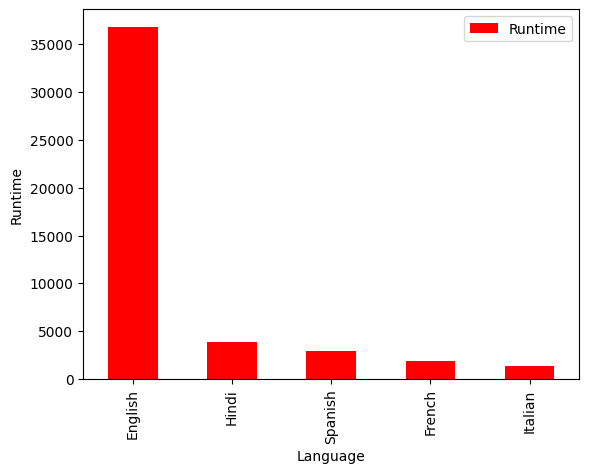

In [20]:
ds.groupby('Language').agg({'Runtime': 'sum'}).sort_values('Runtime', ascending=False).head(5).plot(kind='bar',color='red')
plt.xlabel('Language')
plt.ylabel('Runtime')
plt.show(block=True)

In [21]:
ds_english = ds[ds['Language'] == 'English'].sort_values('IMDB Score', ascending=False)
ds_english.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English


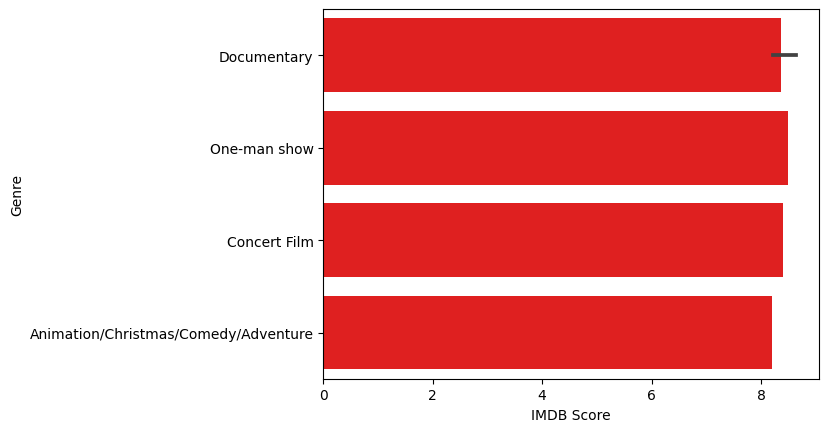

In [22]:
sns.barplot(y=ds_english['Genre'].head(10), x=ds_english['IMDB Score'], color='red')
plt.show(block=True)

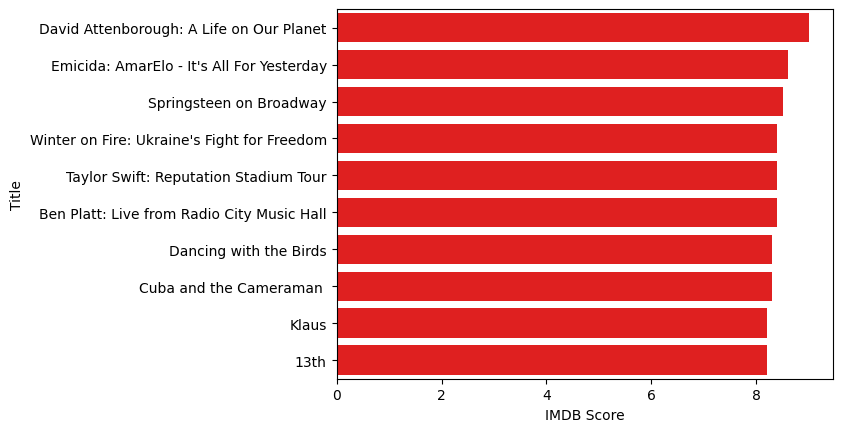

In [23]:
ds_movie = ds[['Title', 'IMDB Score']].sort_values('IMDB Score', ascending=False).head(10)
sns.barplot(y='Title', x='IMDB Score', data=ds_movie, color='red')
plt.show(block=True)

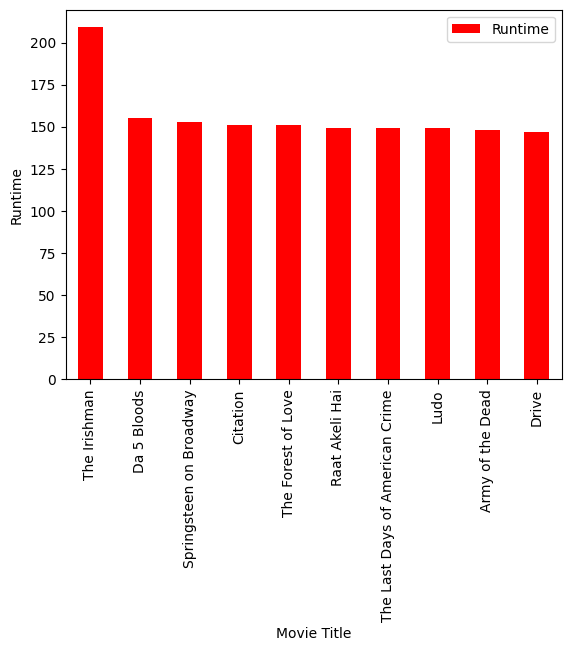

In [24]:
ds[['Title', 'Runtime']].sort_values('Runtime', ascending=False).head(10).plot(x='Title', y='Runtime', kind='bar', color='red')
plt.xlabel('Movie Title')
plt.ylabel('Runtime')
plt.show(block=True)

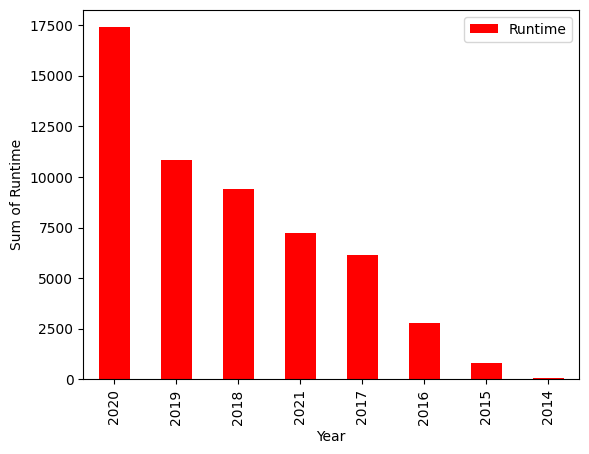

In [25]:
ds_date.groupby('Year').agg({'Runtime': 'sum'}).sort_values('Runtime', ascending=False).plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Sum of Runtime')
plt.show(block=True)

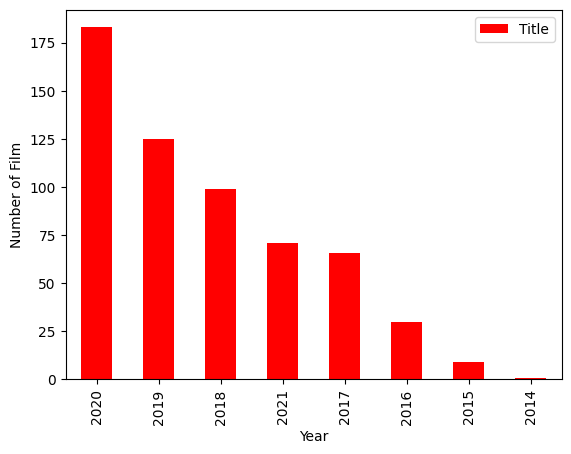

In [26]:
ds_date.groupby('Year').agg({'Title': 'count'}).sort_values('Title', ascending=False).plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Film')
plt.show(block=True)